In [1]:
# Import necessary libraries
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
import os





In [2]:
os.chdir('Downloads')

In [3]:
# Data Extraction
df = pd.read_csv('Steel_industry_data.csv')  # Replace with your file path

# Check the shape of the dataset
print("Dataset shape:", df.shape)

# Display the first few rows of the dataset
df.head()

Dataset shape: (35040, 11)


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2                                   35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.9 MB
Correlation Matrix:
                                      Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive_Power_kVarh   0.896150   
Leading_Current_Reactive_Power_kVarh  -0.324922   
CO2            

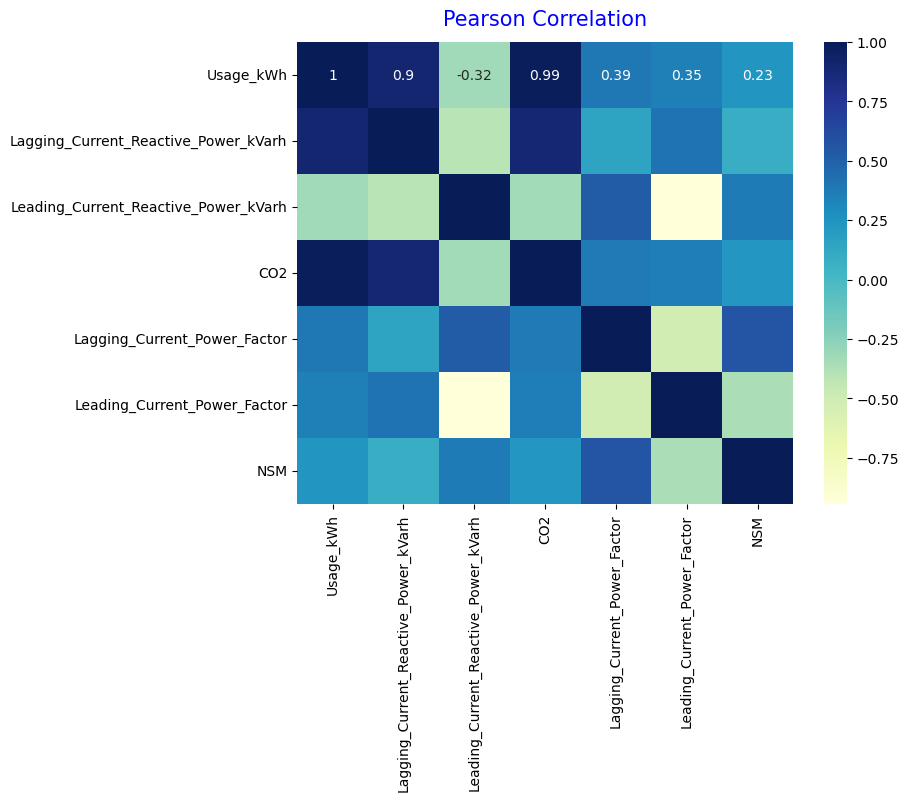

In [5]:
# Rename columns for consistency
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
                        'CO2(tCO2)': 'CO2'})

df1 = df.drop(columns = ['date', 'WeekStatus', 'Day_of_week', 'Load_Type'])

# Display dataset statistics
df1.describe()

# Display dataset information
df1.info()

# Calculate and display the correlation matrix
correlation_matrix = df1.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title("Pearson Correlation", fontsize=15, color='b', pad=12)
plt.show()



C:\Users\nixty\AppData\Local\Temp\ipykernel_16788\1555202361.py:4: FutureWarning: The provided callable <function max at 0x000001B178D65580> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  most_energy_consumption = pd.pivot_table(df, index='date', values='Usage_kWh', aggfunc={'Usage_kWh': np.max})


Top 10 Dates with Maximum Energy Consumption:
                  Usage_kWh
date                       
01/01/2018 00:00       3.42
01/01/2018 00:15       3.17
01/01/2018 00:30       4.00
01/01/2018 00:45       3.24
01/01/2018 01:00       3.31
01/01/2018 01:15       3.82
01/01/2018 01:30       3.28
01/01/2018 01:45       3.60
01/01/2018 02:00       3.60
01/01/2018 02:15       3.28


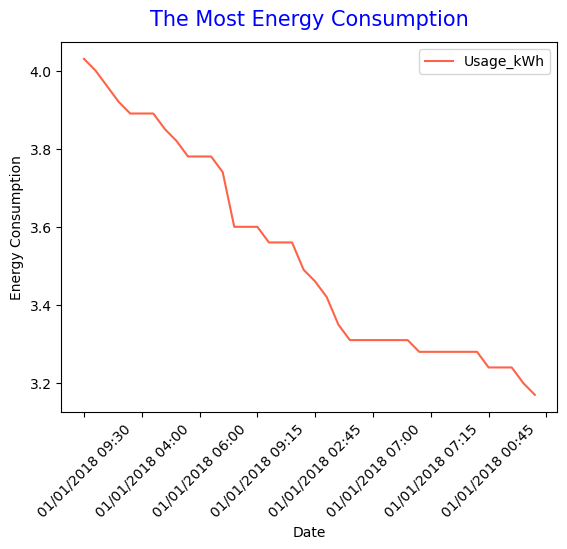

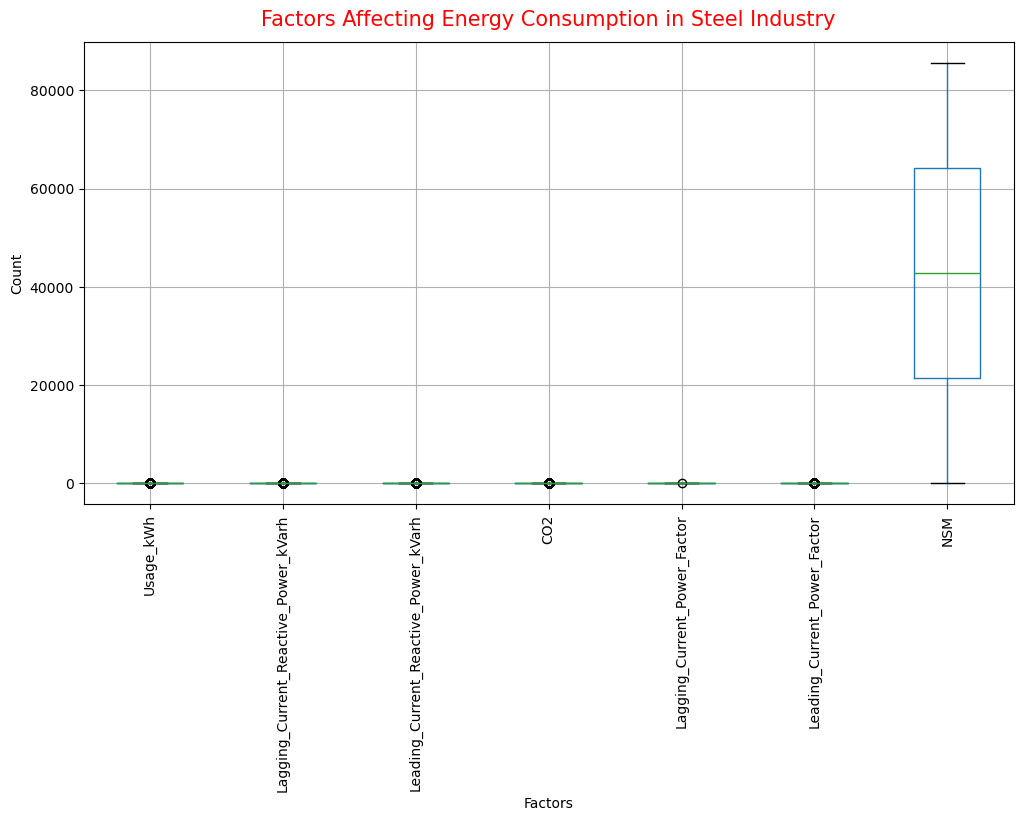

C:\Users\nixty\AppData\Local\Temp\ipykernel_16788\1555202361.py:28: FutureWarning: The provided callable <function mean at 0x000001B178D65F80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, index=['Load_Type', 'Day_of_week', 'WeekStatus'],
C:\Users\nixty\AppData\Local\Temp\ipykernel_16788\1555202361.py:28: FutureWarning: The provided callable <function mean at 0x000001B178D65F80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, index=['Load_Type', 'Day_of_week', 'WeekStatus'],


Pivot Table Analysis:
                                              NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Me

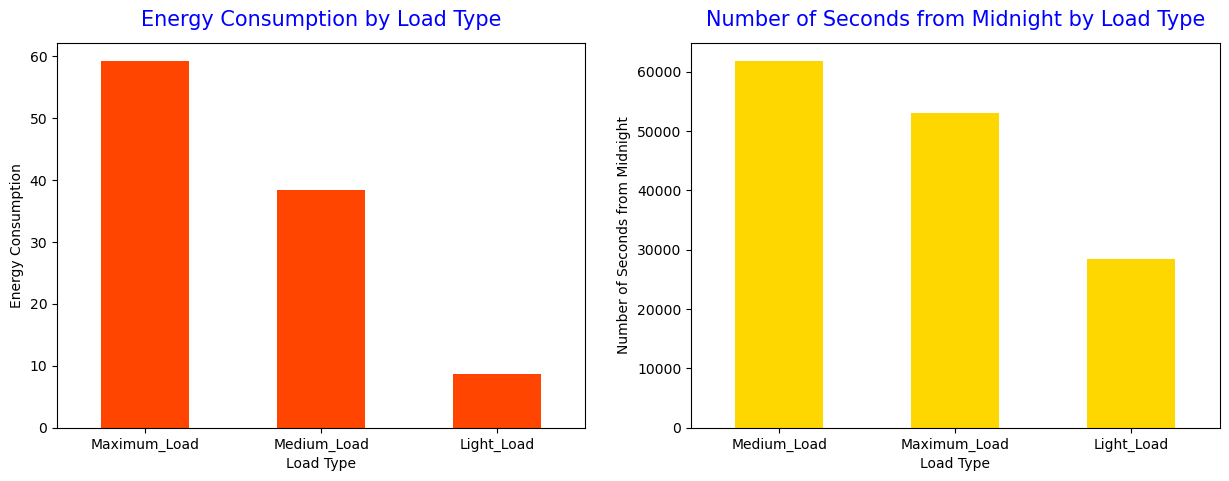

<Figure size 700x500 with 0 Axes>

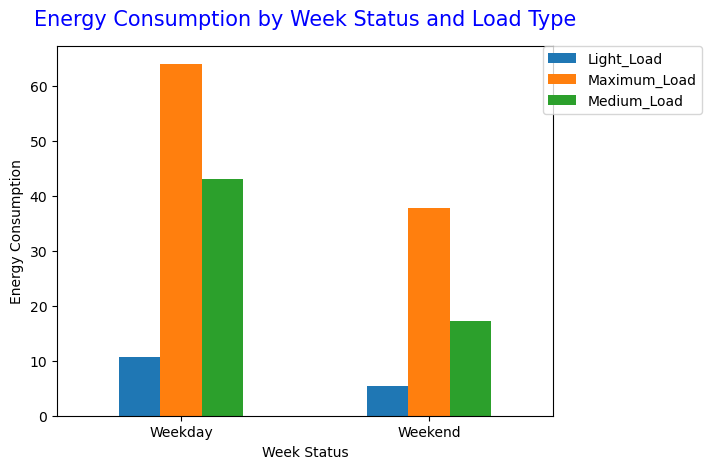

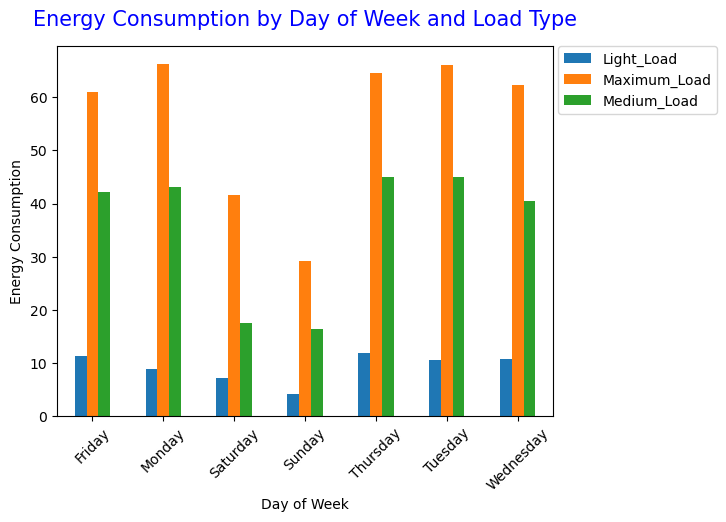

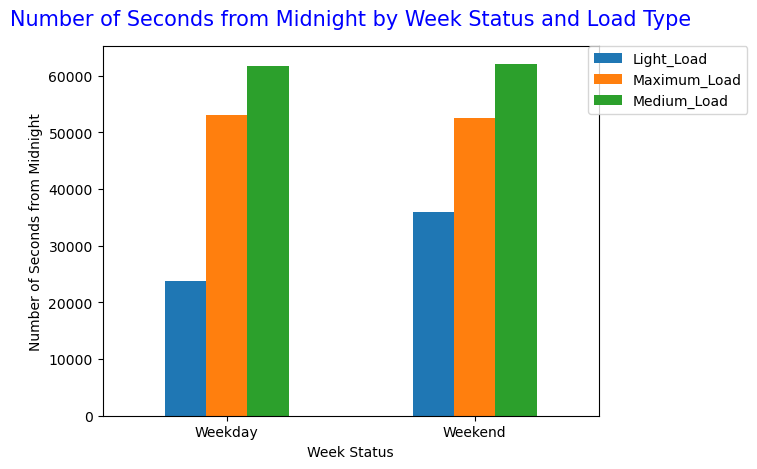

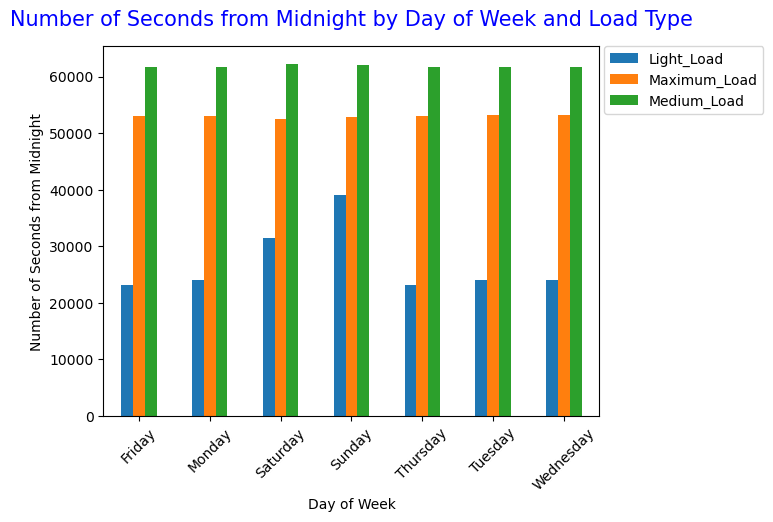

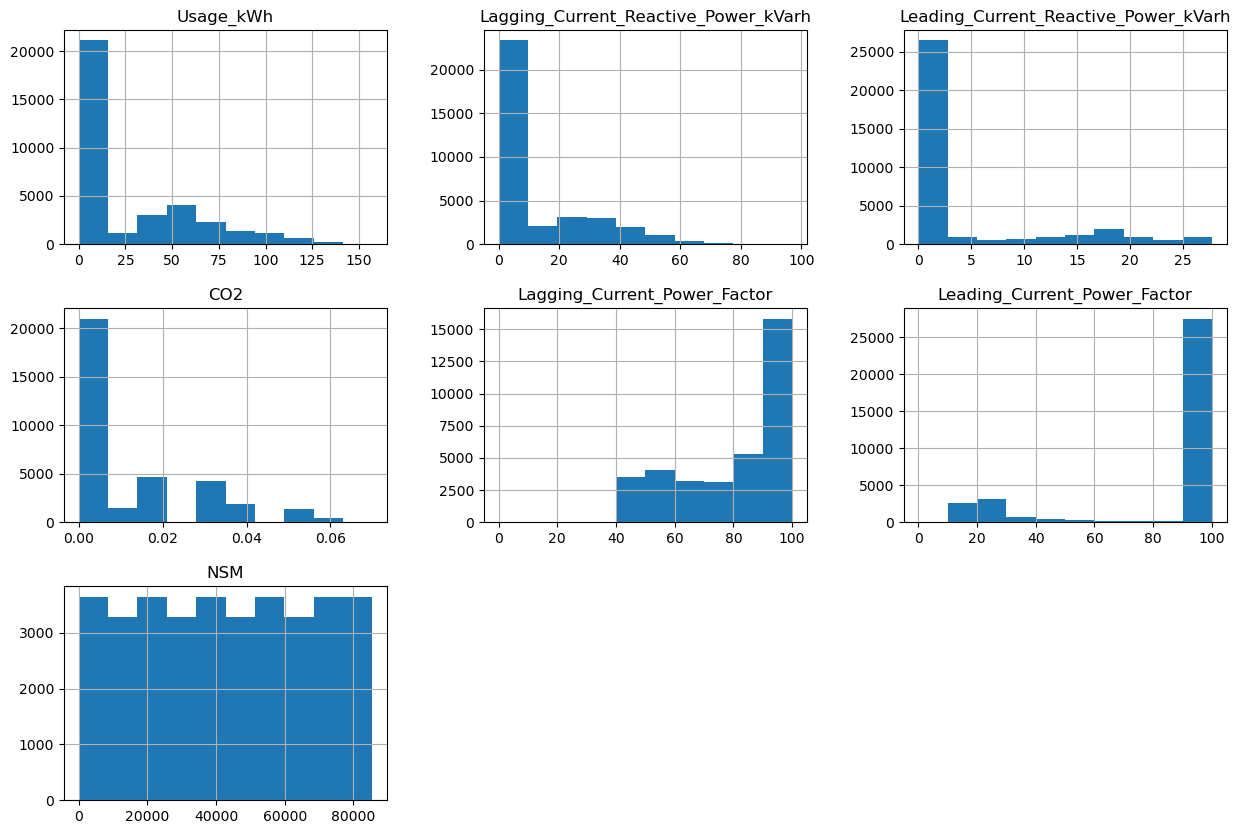

Training Features Shape: (24528, 15)
Training Target Shape: (24528,)
Testing Features Shape: (10512, 15)
Testing Target Shape: (10512,)
CPU times: total: 0 ns
Wall time: 35.4 ms
Linear Regression Model Accuracy: 0.984168162677375
CPU times: total: 15.6 ms
Wall time: 22.7 ms
Ridge Regression Model Accuracy: 0.9683613861527882
CPU times: total: 62.5 ms
Wall time: 30.1 ms
Lasso Regression Model Accuracy: 0.9098749972992152
Model Comparison:
Linear Regression: 0.9842
Ridge Regression: 0.9684
Lasso Regression: 0.9099
Predicted Energy Consumption: [  3.09659745  70.15826234 124.42399214 ...   2.22293667   1.54271064
   3.94845762]
Mean Absolute Error: 2.5519
Mean Squared Error: 17.7694
Root Mean Squared Error: 4.2154


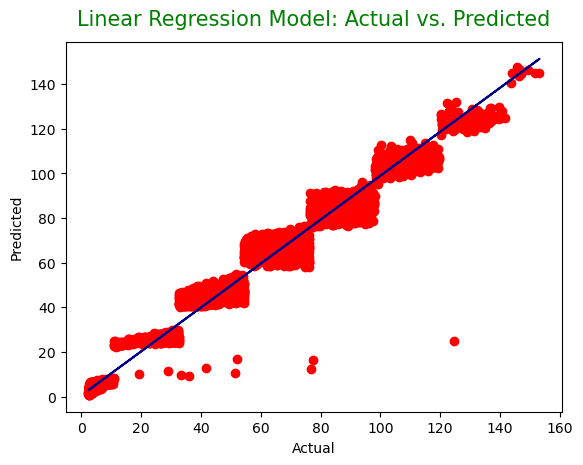

In [6]:
# Exploratory Data Analysis (EDA)

# Analyze the most energy consumption based on time
most_energy_consumption = pd.pivot_table(df, index='date', values='Usage_kWh', aggfunc={'Usage_kWh': np.max})
print("Top 10 Dates with Maximum Energy Consumption:")
print(most_energy_consumption.head(10))

# Visualize the most energy consumption over time
chart = most_energy_consumption[:40].sort_values(by='Usage_kWh', ascending=False).plot(kind='line', color='tomato')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('The Most Energy Consumption', fontsize=15, color='b', loc='center', pad=12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

# Analyze the factors of energy consumption
plt.figure(figsize=(12, 6))
chart = df.boxplot(column=['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 
                           'Leading_Current_Reactive_Power_kVarh', 'CO2',
                           'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Factors Affecting Energy Consumption in Steel Industry', fontsize=15, color='r', pad=12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

# Analyze energy consumption and NSM based on load type, day of week, and week status
pivot_table = pd.pivot_table(df, index=['Load_Type', 'Day_of_week', 'WeekStatus'], 
                             values=['NSM', 'Usage_kWh'], 
                             aggfunc={'NSM': np.mean, 'Usage_kWh': np.mean})
print("Pivot Table Analysis:")
print(pivot_table)

# Visualize energy consumption based on load type
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending=False).plot(kind='bar', color='orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Energy Consumption by Load Type', fontsize=15, color='b', pad=12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

# Visualize number of seconds from midnight based on load type
plt.subplot(1, 2, 2)
chart = df.groupby('Load_Type')['NSM'].mean().sort_values(ascending=False).plot(kind='bar', color='gold')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Number of Seconds from Midnight by Load Type', fontsize=15, color='b', pad=12)
plt.xlabel('Load Type')
plt.ylabel('Number of Seconds from Midnight')
plt.show()

# Visualize energy consumption based on week status and load type
plt.figure(figsize=(7, 5))
chart = df.groupby(['WeekStatus', 'Load_Type'])['Usage_kWh'].mean().unstack().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Energy Consumption by Week Status and Load Type', fontsize=15, pad=15, color='b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0)
plt.show()

# Visualize energy consumption based on day of the week and load type
chart = df.groupby(['Day_of_week', 'Load_Type'])['Usage_kWh'].mean().unstack().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Energy Consumption by Day of Week and Load Type', fontsize=15, pad=15, color='b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

# Visualize the number of seconds from midnight based on week status and load type
chart = df.groupby(['WeekStatus', 'Load_Type'])['NSM'].mean().unstack().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Number of Seconds from Midnight by Week Status and Load Type', fontsize=15, pad=15, color='b')
plt.xlabel('Week Status')
plt.ylabel('Number of Seconds from Midnight')
plt.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0)
plt.show()

# Visualize the number of seconds from midnight based on day of the week and load type
chart = df.groupby(['Day_of_week', 'Load_Type'])['NSM'].mean().unstack().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Number of Seconds from Midnight by Day of Week and Load Type', fontsize=15, pad=15, color='b')
plt.xlabel('Day of Week')
plt.ylabel('Number of Seconds from Midnight')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

# Visualize the distribution of each variable
df.hist(figsize=(15, 10))
plt.show()

# Regression Model

# Indexing date
df = df.set_index('date')

# Handling categorical data
df = pd.get_dummies(df, drop_first=True)

# Split data into features and target variable
X = df.drop('Usage_kWh', axis=1)
y = df['Usage_kWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training Features Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Target Shape:", y_test.shape)

# Linear Regression Model
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Linear Regression Model Accuracy:", lr_score)

# Ridge Regression Model
ridge = Ridge(alpha=0.5)
%time ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
print("Ridge Regression Model Accuracy:", ridge_score)

# Lasso Regression Model
lasso = Lasso(alpha=0.5)
%time lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)
print("Lasso Regression Model Accuracy:", lasso_score)

# Comparison of the three models
print("Model Comparison:")
print(f"Linear Regression: {lr_score:.4f}")
print(f"Ridge Regression: {ridge_score:.4f}")
print(f"Lasso Regression: {lasso_score:.4f}")

# Prediction using the Linear Regression Model
y_pred = lr.predict(X_test)
print("Predicted Energy Consumption:", y_pred)

# Calculate MAE, MSE, and RMSE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

# Visualize the actual vs. predicted energy consumption
x = y_test
y = y_pred

plt.title('Linear Regression Model: Actual vs. Predicted', fontsize=15, color='g', pad=12)
plt.plot(x, y, 'o', color='r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()